<a href="https://colab.research.google.com/github/IDCE-MSGIS/lab-5-airport-historgram-data-jstrzempko/blob/main/Jess_Strzempko_Airport_histogram_data_IDCE30274Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jess Strzempko  
Created 11.13.20  
Python version 3.6.9  
IDCE 30274 Computer Programming for GIS  

## Lab 5 - Airport Histogram Data

This script imports tabular data, explores it, manipulates it, and analyzes it to provide a basic graphic representation of quantitative information. Throughout the four challenges below, information on worldwide airports and international airline routes is parsed to produce a dictionaries and a list containing relevant information. A histogram is then produced from the list of route distances. 

**Inputs:**  

* `Camp_stat.csv`
* `airports.dat`
* `routes.dat`  
* Packages
  + `csv`
  + `cos`, `radians`, `sin`, `pow`, `asin`, `sqrt` (from `math`)
  + `matplotlib.pyplot`

**Outputs:**  
* Challenge 1: printed airport names for Russia
* Challenge 2: 2 dictionaries of airport ID as key with latitudes & longitudes as values
* Challenge 3: list of route distances calculated
* Challenge 4: histogram of route distances

In [ ]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

# Import the csv library for csv parsing and writing
import csv
# Define variable f to open the csv
f = open("Camp_stats.csv")
# Run a for loop using csv.reader() to print each row
# Each row is read as a list of strings representing the fields
for row in csv.reader(f):
    print(row)

In [ ]:
# Challenge 1
# print all of the airport names for a particular country

# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

# Import csv library & open airports.dat
import csv
f = open("airports.dat")

# Start a count at 0
count = 0
# Run through every line in the csv
for row in csv.reader(f):
  # if the country column == Russia
  if row[3] == "Russia":
    # print the airport name and add to count
    print(row[1])
    count = count + 1
print("Total Number of airports in Russia: ", count)

Saving airports.dat to airports (2).dat


In [ ]:
# Challenge 2
# create a dictionary mapping from an airport ID key to the lat/lon coordinates

# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

# Import csv library & open airports.dat
import csv
f = open("airports.dat")

# Initialize dictionaries for latitude and longitude each 
# these will map airport ID (keys) to coordinates (values)
lat = {}
lon = {}

# Run through every line in the csv
for row in csv.reader(f):
  # Add airport ID as the key and lat & lon as the values, respectively
  lat[row[0]] = row[6]
  lon[row[0]] = row[7]

Saving airports.dat to airports (1).dat


In [ ]:
#Challenge 3
# write a program that reads all the airline routes from “routes.dat” 
# looks up the lat and lon of source and destination airports
# and builds a list of route distances

# Using the Haversine formula for geographic Great Circle Distance
#
# As per https://en.wikipedia.org/wiki/Haversine_formula

from math import cos, radians, sin, pow, asin, sqrt

def distance(lat1, long1, lat2, long2):
    radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius

    # Lat,long are in degrees but we need radians
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    long1 = radians(long1)
    long2 = radians(long2)

    dlat = lat2 - lat1
    dlon = long2 - long1

    a = pow(sin(dlat / 2), 2) + cos(lat1) * cos(lat2) * pow(sin(dlon / 2), 2)
    distance = 2 * radius * asin(sqrt(a))

    return distance

# Code to import and check the geo_distance.py file to make sure it works.
distance(-37.814, 144.963, 52.519, 13.406)

# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

# Import csv library & open routes.dat
import csv
r = open("routes.dat")

# Initialize an empty list
routes = []
# Run through every line in the csv
for row in csv.reader(r):
  source = row[3]
  dest = row[5]
  if source in lat and dest in lat:
    dist = distance(float(lat[source]), float(lon[source]), float(lat[dest]), float(lon[dest]))
    routes.append(dist)

Saving routes.dat to routes (1).dat


Text(0.5, 1.0, 'Histogram of Airline Travel Distances')

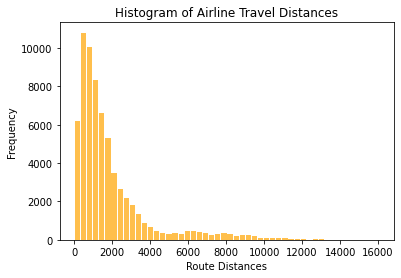

In [ ]:
# Challenge 4
# create a histogram of the flight distances

# Import pyplot from matplotlib library
import matplotlib.pyplot as plt

# Use plt.hist to create a histogram of values from routes list
# Example used: https://realpython.com/python-histograms/
plt.hist(routes, 50, color = '#ffa500', alpha = 0.7, rwidth = 0.85)
# Add axis labels and a title
plt.xlabel('Route Distances (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Airline Travel Distances')